In [191]:
# Importing the basics
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

TEST_PROPORTION = 0.1
VAL_PROPORTION = 0.15
FILE_PATH = "clean_dataset.csv"

cpu


In [192]:
#Job resume categorization, callback or no callback, categorize without attributes to bias it such as names or gender,
#dataset is randomized and sent to real job applications that gave or did not give callbacks.

#A test set where we can verify there is no bias to name or gender would be great, only based on experience or schooling, since there is a chance there could
#be bias in the callbacks in the data

#Maybe a more general model by combining similar datasets? As this one is strictly 2 cities in the USA during 2001-2002

#If the vector at the end can be linked back to either name or gender or [insert other attribute that should not have bias], the AI is still biased.

#If anyone is reading this, would it be possible to drop the chosen dataset's/datasets' zip file/s in the discord?

In [193]:
# Read Dataset
data = pd.read_csv(FILE_PATH)

# Drop zipcodes
data = data.drop(["ZipCode","Ethnicity"], axis=1)

# One hot encode categorical attributes.
columns = ["Industry", "Citizen"]
data = pd.get_dummies(data=data, columns=columns, dtype=int)
ones = 0
zeros = 0
for index, row in data.iterrows():
    if row['Gender']==1:
        ones+=1
    else:
        zeros+=1

ones2=0
zeros2=0
for index, row in data.iterrows():
    if row['Gender']==1:
        if ones2 > min(ones,zeros):
            print(index)
            data = data.drop(index=index)
        ones2+=1
    else:
        if zeros2 > min(ones,zeros):
            print(index)
            data = data.drop(index=index)
        zeros2+=1


ones = 0
zeros = 0
for index, row in data.iterrows():
    if row['Gender']==1:
        ones+=1
    else:
        zeros+=1

print("ones:",ones)
print("zeros:",zeros)


# To pytorch.tensor format
X_tensor = torch.tensor(
    data.drop(["Approved", "Gender"], axis=1).values, dtype=torch.float32
)
y_tensor_approved = F.one_hot(torch.tensor(data["Approved"].values, dtype=torch.int64))
y_tensor_gender = F.one_hot(torch.tensor(data["Gender"].values, dtype=torch.int64))

# Define a custom dataset
class Custom_Dataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Init Dataset
pay_dataset = Custom_Dataset(X_tensor, y_tensor_gender)

# Calculate Dataset proportions
test_size = int(TEST_PROPORTION * len(pay_dataset))
val_size = int(VAL_PROPORTION * len(pay_dataset))
train_size = len(pay_dataset) - test_size - val_size

# Creates datasets
train_pay_dataset, val_pay_dataset, test_pay_dataset = torch.utils.data.random_split(
    pay_dataset, [train_size, val_size, test_size]
)

# Creates DataLoaders.
train_gender_loader = DataLoader(train_pay_dataset, shuffle=True, batch_size=16)
val_gender_loader = DataLoader(val_pay_dataset, shuffle=True, batch_size=16)
test_gender_loader = DataLoader(val_pay_dataset, shuffle=True, batch_size=16)


# Init Dataset
pay_dataset = Custom_Dataset(X_tensor, y_tensor_approved)

# Calculate Dataset proportions
test_size = int(TEST_PROPORTION * len(pay_dataset))
val_size = int(VAL_PROPORTION * len(pay_dataset))
train_size = len(pay_dataset) - test_size - val_size

# Creates datasets
train_pay_dataset, val_pay_dataset, test_pay_dataset = torch.utils.data.random_split(
    pay_dataset, [train_size, val_size, test_size]
)

# Creates DataLoaders.
train_approved_loader = DataLoader(train_pay_dataset, shuffle=True, batch_size=16)
val_approved_loader = DataLoader(val_pay_dataset, shuffle=True, batch_size=16)
test_approved_loader = DataLoader(val_pay_dataset, shuffle=True, batch_size=16)

#TODO Delete
it = iter(train_gender_loader)

311
314
315
316
317
318
319
320
323
324
326
327
328
329
330
332
334
335
336
339
341
342
343
344
345
346
347
348
349
351
352
353
354
356
358
361
362
363
364
365
367
369
370
371
373
374
376
377
378
379
380
384
385
386
387
388
389
390
391
392
393
394
396
398
399
400
401
404
408
409
410
411
413
414
416
417
418
420
421
422
423
424
425
427
428
429
430
431
432
433
434
435
436
439
440
441
442
443
446
448
449
450
451
452
453
454
455
456
457
458
459
461
462
466
468
469
471
472
473
474
475
476
477
478
479
481
483
484
485
486
487
488
489
491
492
495
497
498
499
500
501
503
505
509
510
513
514
515
517
519
520
522
525
526
529
532
533
534
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
555
556
558
561
562
563
564
566
568
570
571
572
575
576
577
578
579
580
581
582
583
585
586
587
588
589
590
591
592
593
594
595
598
599
601
602
603
604
606
607
608
609
610
611
612
613
615
616
617
618
619
620
621
623
624
625
626
627
628
633
635
636
637
638
639
640
641
642
644
645
647
648
650
653
656


In [194]:
batch = next(it)

# Test print TODO Delete
print(batch[0][0,:])
print(batch[1][0])

print(data.drop(["Approved", "Gender"], axis=1).columns)

tensor([ 40.0000,   6.5000,   1.0000,   1.0000,   3.5000,   1.0000,   1.0000,
          1.0000,   0.0000, 500.0000,   0.0000,   0.0000,   1.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000])
tensor([0, 1])
Index(['Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Income',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Citizen_ByBirth', 'Citizen_ByOtherMeans',
       'Citizen_Temporary'],
      dtype='object')


In [195]:
# Define basic ANN
class ANN_approved(nn.Module):
    def __init__(self):
        super().__init__()
        self.act = nn.LeakyReLU()
        self.drop = nn.Dropout(p=0.5)

        self.l1 = nn.Linear(27, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 2)

        self.soft = nn.Softmax(1)

    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        self.drop(x)
        x = self.l2(x)
        out = self.act(x)
        self.drop(out)
        out = self.soft(out)
        out = self.l3(out)
        return out, x

In [196]:
# Define basic ANN
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.act = nn.LeakyReLU()
        self.drop = nn.Dropout(p=0.5)

        self.l1 = nn.Linear(16, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 2)

        self.soft = nn.Softmax(1)

    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        self.drop(x)
        x = self.l2(x)
        x = self.act(x)
        self.drop(x)
        x = self.l3(x)
        x = self.soft(x)
        return x

In [197]:
def train_model_2(model, train_loader, val_loader, epochs, optimizer, criterion, augment=None):

    best_model = None

    best_val_loss = float('inf')
    train_lst = []
    val_lst = []

    for epoch in range(epochs):
        print("-"*15)
        print("Processing epoch:",epoch+1,"of",epochs)
        print("-"*15)
        model.train()

        train_loss = 0
        train_count = 0

        for batch_nr, (features,label) in enumerate(train_loader):
            features, label = features.to(device), label.to(device).float()

            #Add augmentations
            if augment!=None:
                features = augment(features)
            prediction = model(features)[0].squeeze()

            optimizer.zero_grad()
            loss = criterion(prediction, label)
            loss.backward()
            optimizer.step()

            train_loss  +=  loss.item()
            train_count +=  1

            #if (batch_nr%10==0):
            #    print("Batch_nr: ", batch_nr, "\tTrain loss: ", (loss.item()))

        val_loss = 0
        val_count = 0

        model.eval()
        for batch_nr, (features,label) in enumerate(val_loader):
            features, label = features.to(device), label.to(device).float()

            prediction = model(features)[0].squeeze()

            loss = criterion(prediction, label)

            val_loss  +=  loss.item()
            val_count +=  1

        
        print("Validation loss:\t", (val_loss/val_count))
        val_lst.append((val_loss/val_count))
        print("Training loss:  \t", (train_loss/train_count))
        train_lst.append((train_loss/train_count))

        if (val_loss/val_count) < best_val_loss:
            best_val_loss = val_loss/val_count
            torch.save(model, "best_model.pt")
            best_model = model

    return best_model,train_lst,val_lst

In [198]:
def train_model(model1,model2, train_loader, val_loader, epochs, optimizer, criterion, augment=None):

    best_model = None

    best_val_loss = float('inf')
    train_lst = []
    val_lst = []

    for epoch in range(epochs):
        print("-"*15)
        print("Processing epoch:",epoch+1,"of",epochs)
        print("-"*15)
        model1.eval()
        model2.train()

        train_loss = 0
        train_count = 0

        for batch_nr, (features,label) in enumerate(train_loader):
            features, label = features.to(device), label.to(device).float()

            #Add augmentations
            if augment!=None:
                features = augment(features)
            prediction, final = model1(features)
            prediction = model2(final).squeeze()

            optimizer.zero_grad()
            loss = criterion(prediction, label)
            loss.backward()
            optimizer.step()

            train_loss  +=  loss.item()
            train_count +=  1

            #if (batch_nr%10==0):
            #    print("Batch_nr: ", batch_nr, "\tTrain loss: ", (loss.item()))

        val_loss = 0
        val_count = 0

        model2.eval()
        for batch_nr, (features,label) in enumerate(val_loader):
            features, label = features.to(device), label.to(device).float()

            prediction, final = model1(features)
            prediction = model2(final).squeeze()

            loss = criterion(prediction, label)

            val_loss  +=  loss.item()
            val_count +=  1

        
        print("Validation loss:\t", (val_loss/val_count))
        val_lst.append((val_loss/val_count))
        print("Training loss:  \t", (train_loss/train_count))
        train_lst.append((train_loss/train_count))

        if (val_loss/val_count) < best_val_loss:
            best_val_loss = val_loss/val_count
            torch.save(model2, "best_model2.pt")
            best_model = model2

    return best_model,train_lst,val_lst

In [199]:
def test_model(test_loader,model1,model2):
    all_preds = []
    all_targets = []

    for batch_nr, (features,label) in enumerate(test_loader):
        features, label = features.to(device), label.to(device).type(torch.int)


        prediction, final = model1(features)
        prediction = model2(final).squeeze().round().type(torch.int)
        
        all_preds.extend(torch.argmax(prediction.detach(),dim=1).tolist())
        all_targets.extend(torch.argmax(label,dim=1).tolist())

    cm = [[0,0],[0,0]]
    for p,t in zip(all_preds,all_targets):
        cm[p][t]+=1
    
    return cm

In [200]:
def test_gender(model1,model2):
    cm = test_model(test_gender_loader,model1,model2)
    print("\t\t Male Prediction \t Female Prediction")
    print("Male Label \t",cm[1][1],"\t\t\t",cm[0][1])
    print("Female Label\t",cm[1][0],"\t\t\t",cm[0][0])
    
    print()
    print()
    print("Accuracy:",(cm[1][1]+cm[0][0])/(cm[1][1]+cm[0][1]+cm[1][0]+cm[0][0]))
    print()
    print("Accuracy male:",(cm[1][1])/(cm[1][1]+cm[0][1]))
    print("Precision male:",(cm[1][1]/(cm[1][1]+cm[1][0])))
    print("Recall male:",(cm[1][1]/(cm[1][1]+cm[0][1])))
    print("F1-score male:",(cm[1][1]*2)/(cm[1][1]*2+cm[0][1]+cm[1][0]))
    print()
    print("Accuracy female:",(cm[0][0])/(cm[1][0]+cm[0][0]))
    print("Precision female:",(cm[0][0]/(cm[0][0]+cm[0][1])))
    print("Recall female:",(cm[0][0]/(cm[0][0]+cm[1][0])))
    print("F1-score female:",(cm[0][0]*2)/(cm[0][0]*2+cm[1][0]+cm[0][1]))

In [201]:
epochs = 1500
learning_rate = 0.0003
decay = 0.0025

model = ANN_approved()
weight = 1
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,weight]))
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=decay)

best_model1, train_lst1, val_lst1 = train_model_2(model=model,train_loader=train_approved_loader,val_loader=val_approved_loader,epochs=epochs,optimizer=optimizer,criterion=criterion)

model_2 = ANN()
weight = 1
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1,weight]))
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=decay)

best_model2, train_lst2, val_lst2 = train_model(model1=best_model1, model2 = model_2 ,train_loader=train_gender_loader,val_loader=val_gender_loader,epochs=epochs,optimizer=optimizer,criterion=criterion)


---------------
Processing epoch: 1 of 1500
---------------
Validation loss:	 0.679347351193428
Training loss:  	 0.6793128967285156
---------------
Processing epoch: 2 of 1500
---------------
Validation loss:	 0.6768175363540649
Training loss:  	 0.6763145446777343
---------------
Processing epoch: 3 of 1500
---------------
Validation loss:	 0.6743391901254654
Training loss:  	 0.6737020343542099
---------------
Processing epoch: 4 of 1500
---------------
Validation loss:	 0.6721664667129517
Training loss:  	 0.6707544922828674
---------------
Processing epoch: 5 of 1500
---------------
Validation loss:	 0.6672109663486481
Training loss:  	 0.6682345002889634
---------------
Processing epoch: 6 of 1500
---------------
Validation loss:	 0.6655360907316208
Training loss:  	 0.6657981842756271
---------------
Processing epoch: 7 of 1500
---------------
Validation loss:	 0.6606982946395874
Training loss:  	 0.6631997197866439
---------------
Processing epoch: 8 of 1500
---------------
Val

In [202]:
test_gender(best_model1,best_model2)

		 Male Prediction 	 Female Prediction
Male Label 	 25 			 5
Female Label	 15 			 18


Accuracy: 0.6825396825396826

Accuracy male: 0.8333333333333334
Precision male: 0.625
Recall male: 0.8333333333333334
F1-score male: 0.7142857142857143

Accuracy female: 0.5454545454545454
Precision female: 0.782608695652174
Recall female: 0.5454545454545454
F1-score female: 0.6428571428571429


In [203]:
len(val_lst1)

1500

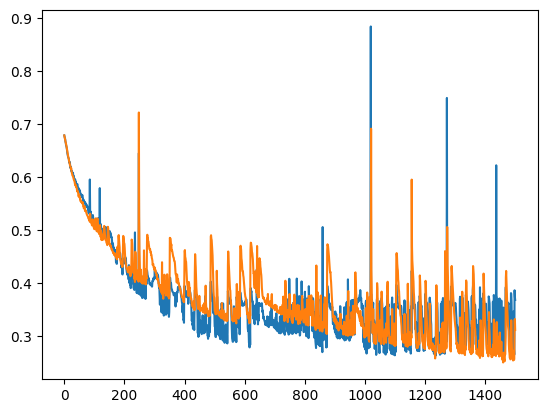

In [204]:
plt.plot(val_lst1)
plt.plot(train_lst1)

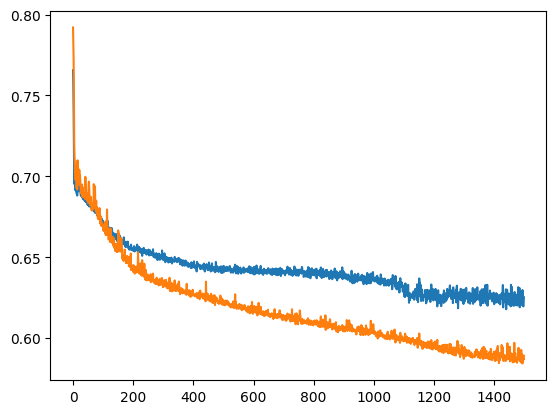

In [205]:
plt.plot(val_lst2)
plt.plot(train_lst2)